# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

## 1. Load and check the dataset

In [2]:
#load useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math

In [3]:
#import the data
df = pd.read_csv("Summary of Weather.csv", encoding='latin1')
df.shape[0] # number of rows in the dataframe

C:\Users\GGPC\AppData\Local\Temp\ipykernel_48288\482264606.py:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Summary of Weather.csv", encoding='latin1')


119040

In [4]:
missing_data = df.isnull().sum().to_frame()

# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})

# Print the results
print(missing_data)

             Empty Cells
STA                    0
Date                   0
Precip                 0
WindGustSpd       118508
MaxTemp                0
MinTemp                0
MeanTemp               0
Snowfall            1163
PoorWeather        84803
YR                     0
MO                     0
DA                     0
PRCP                1932
DR                118507
SPD               118508
MAX                  474
MIN                  468
MEA                  498
SNF                 1163
SND               113477
FT                119040
FB                119040
FTI               119040
ITH               119040
PGT               118515
TSHDSBRSGF         84803
SD3               119040
RHX               119040
RHN               119040
RVG               119040
WTE               119040


In [5]:
df = df.convert_dtypes()
df.dtypes

STA                     Int64
Date           string[python]
Precip         string[python]
WindGustSpd           Float64
MaxTemp               Float64
MinTemp               Float64
MeanTemp              Float64
Snowfall               object
PoorWeather            object
YR                      Int64
MO                      Int64
DA                      Int64
PRCP           string[python]
DR                      Int64
SPD                     Int64
MAX                     Int64
MIN                     Int64
MEA                     Int64
SNF                    object
SND                     Int64
FT                      Int64
FB                      Int64
FTI                     Int64
ITH                     Int64
PGT                   Float64
TSHDSBRSGF             object
SD3                     Int64
RHX                     Int64
RHN                     Int64
RVG                     Int64
WTE                     Int64
dtype: object

## 2. Clean the dataset, drop variables

In [6]:
# We can tremove any column that is 100$ empty
df = df.dropna(axis=1, how='all')
df.dtypes

STA                     Int64
Date           string[python]
Precip         string[python]
WindGustSpd           Float64
MaxTemp               Float64
MinTemp               Float64
MeanTemp              Float64
Snowfall               object
PoorWeather            object
YR                      Int64
MO                      Int64
DA                      Int64
PRCP           string[python]
DR                      Int64
SPD                     Int64
MAX                     Int64
MIN                     Int64
MEA                     Int64
SNF                    object
SND                     Int64
PGT                   Float64
TSHDSBRSGF             object
dtype: object

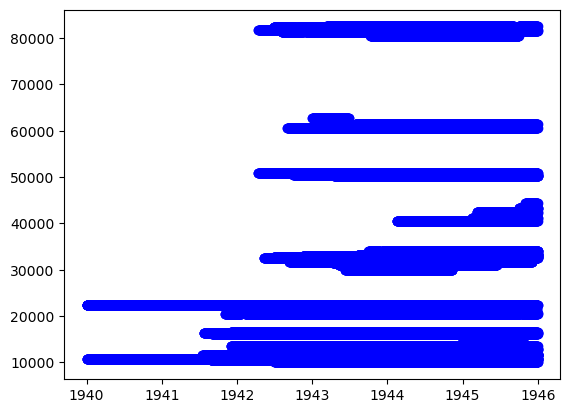

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
plt.scatter(df['Date'], df['STA'], marker='o', linestyle='-', color='b')

C:\Users\GGPC\AppData\Local\Temp\ipykernel_48288\2697585520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precip['Precip'] = pd.to_numeric(df_precip['Precip'], errors='coerce')


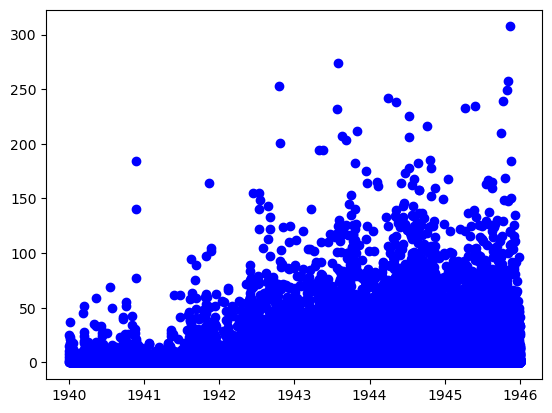

In [19]:
df_precip = df[df['Precip'] != 'T']
df_precip['Precip'] = pd.to_numeric(df_precip['Precip'], errors='coerce')
df_precip.head(10)
plt.scatter(df_precip['Date'], df_precip['Precip'], marker='o', linestyle='-', color='b')
df_precip = None

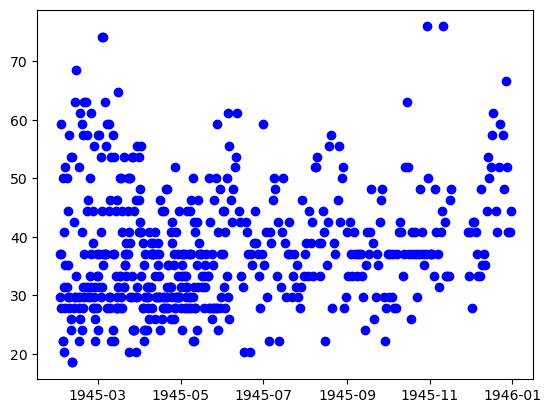

In [10]:
plt.scatter(df['Date'], df['WindGustSpd'], marker='o', linestyle='-', color='b')

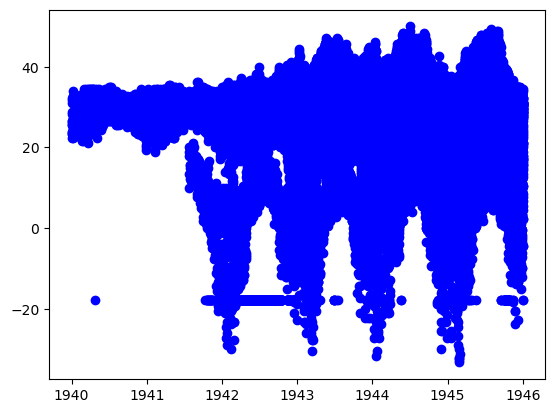

In [11]:
plt.scatter(df['Date'], df['MaxTemp'], marker='o', linestyle='-', color='b')

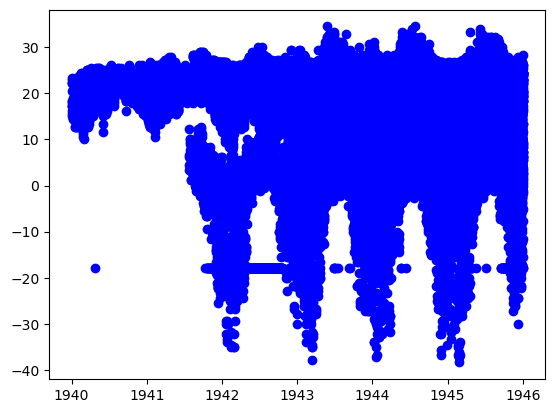

In [12]:
plt.scatter(df['Date'], df['MinTemp'], marker='o', linestyle='-', color='b')

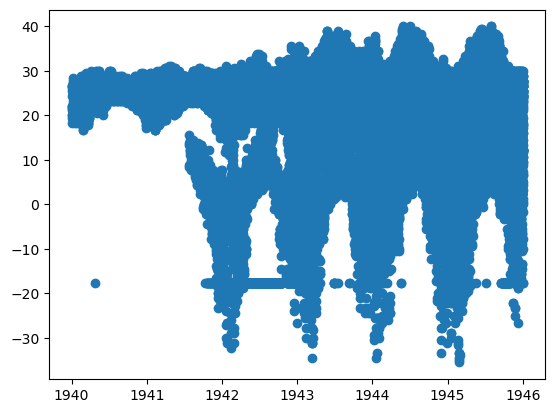

In [14]:
plt.scatter(df["Date"], df["MeanTemp"])

We can see erronius data where max and min temp are the same all at (visably) the same location thus we need to remove values where max temp = min temp

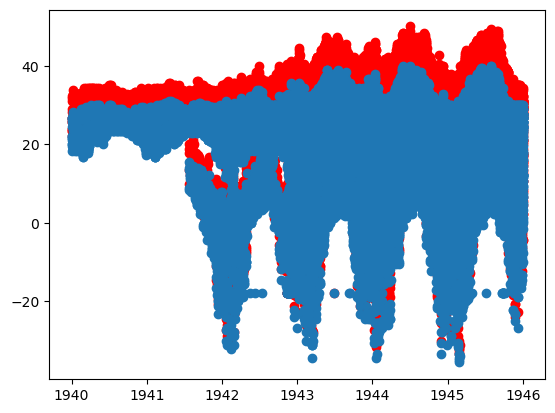

In [16]:
df = df[df['MaxTemp'] != df['MinTemp']]
plt.scatter(df["Date"], df["MaxTemp"], color='red', label='Max Temp')
plt.scatter(df["Date"], df["MeanTemp"])

In [17]:
df = df[df['MaxTemp'] > df['MeanTemp']]
df = df[df['MinTemp'] < df['MeanTemp']]

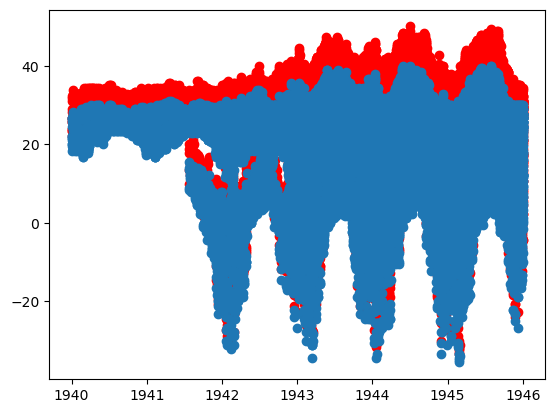

In [18]:
df = df[df['MaxTemp'] != df['MinTemp']]
plt.scatter(df["Date"], df["MaxTemp"], color='red', label='Max Temp')
plt.scatter(df["Date"], df["MeanTemp"])

In [24]:
#plt.scatter(df["Date"], df["Snowfall"], marker='o', linestyle='-', color='b')

## 3. Select the feature(s) for the model, and explain the reason

In [20]:
# write your answer here

## 4. Split the dataset (80% for training, 20% for testing)

## 5. Choose the algorithm, train and test the model

## 6. Evaluate and Visualize model Performance

## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

In [21]:
# write your answer here

## 8. Discuss the model performance based on the plot

In [22]:
# write your answer here